In [ ]:
!pip install geotile


In [ ]:
!pip install GeoPatch

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from geotile import GeoTile
import rasterio as rio
from rasterio.plot import show
import os,random
from GeoPatch import TrainPatch

In [ ]:
gt = GeoTile(r"/content/drive/MyDrive/sat_data/sat_image.tif")
gt.rasterization(input_vector='/content/drive/MyDrive/sat_data/Shapefile/river.shp', out_path='/content/drive/MyDrive/sat_data/mask.tif' )

In [ ]:
gt.close()

In [ ]:
# def normalize_image(img):
#     img_min, img_max = np.min(img), np.max(img)
#     return ((img - img_min) / (img_max - img_min) * 255).astype(np.uint8)

In [ ]:
def percentile_normalize(img, lower_percentile=2, upper_percentile=98):
    p_low, p_high = np.percentile(img, (lower_percentile, upper_percentile))
    img_clipped = np.clip(img, p_low, p_high)
    return ((img_clipped - p_low) / (p_high - p_low) * 255).astype(np.uint8)


In [ ]:
with rio.open("/content/drive/MyDrive/sat_data/sat_image.tif") as src:
    img = src.read([3,2,1])
    img_bnd = src.read(4)
    meta = src.meta
with rio.open("/content/drive/MyDrive/sat_data/mask.tif") as mask_src:
    mask = mask_src.read()

In [ ]:
img_normalized = np.stack([percentile_normalize(img[i]) for i in range(3)], axis=0)

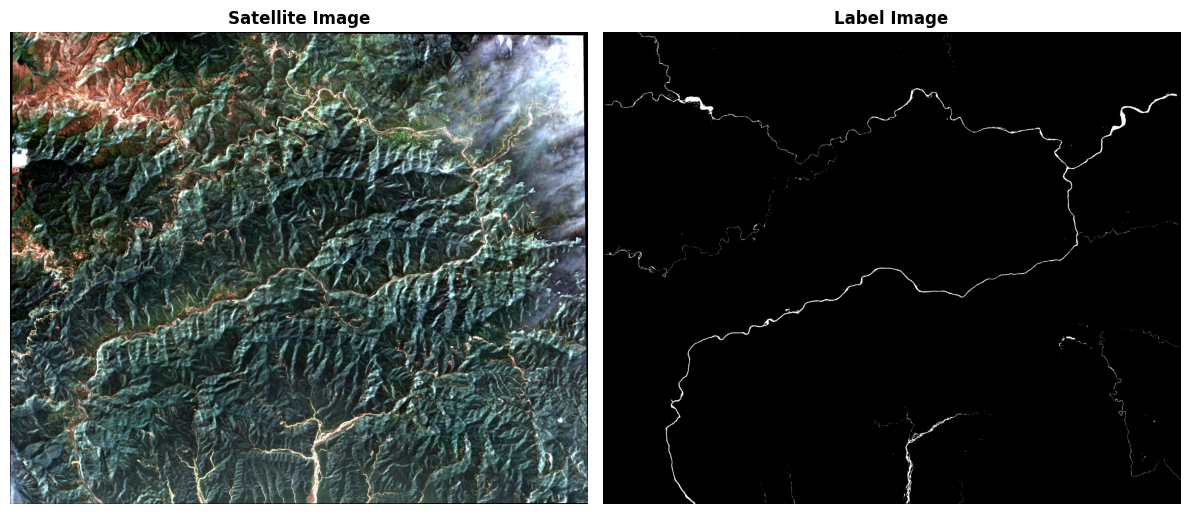

In [ ]:
# Step 4: Plot the satellite image using rasterio's built-in plot function
fig,(ax1,ax2) = plt.subplots(1,2,figsize = (12,6))
show(img_normalized, ax=ax1, title='Satellite Image', transform= src.transform)
ax1.set_axis_off()

# Step 5: Plot the label image using rasterio's plot function
show(mask, ax=ax2, title='Label Image', transform= mask_src.transform, cmap='gray')
ax2.set_axis_off()

# Display the plots
plt.tight_layout()
plt.show()

In [ ]:

patch= TrainPatch( image="sat_img.tif", label="mask.tif",patch_size=128, stride=64, channel_first=True)
patch.data_dimension()

patch.patch_info()


patch, label= patch.save_numpy(folder_name="npy", only_label=False, return_stacked=True, save_stack=False, V_flip=True, H_flip=True, Rotation=True)




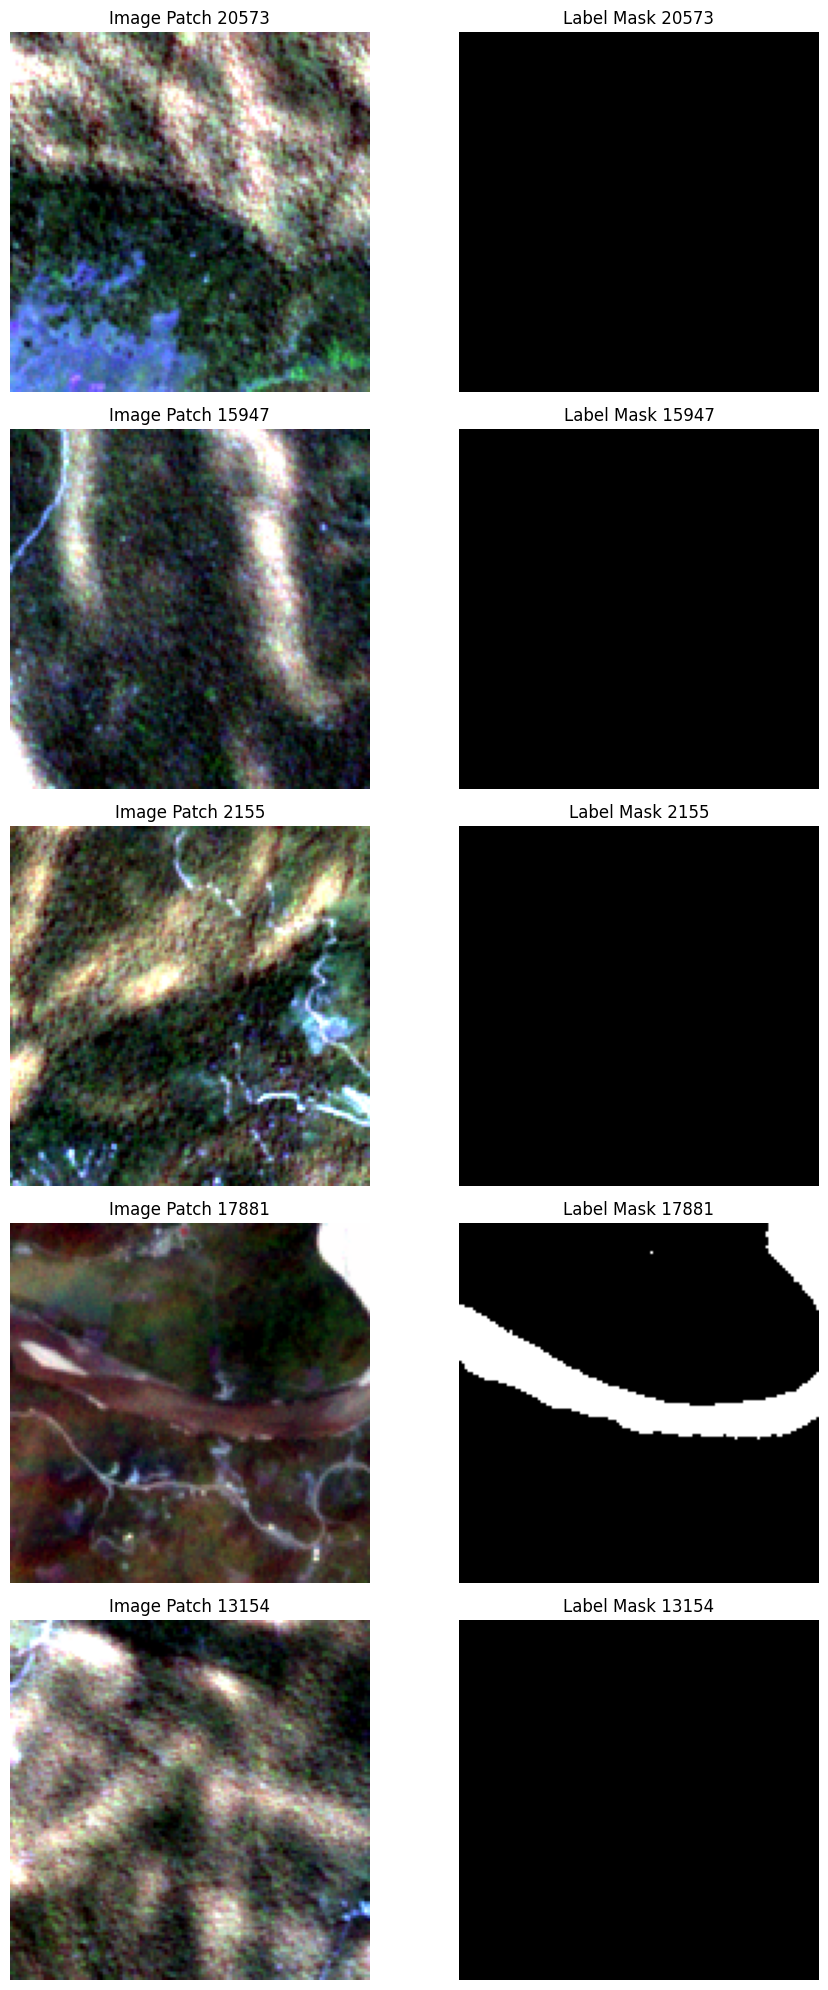

In [ ]:


# Folder paths for image patches and masks
image_folder = '/content/npy/patch'
mask_folder = '/content/npy/label'

# Get the list of all files in the image and mask folders
image_files = sorted(os.listdir(image_folder))
mask_files = sorted(os.listdir(mask_folder))

# Ensure both folders contain the same number of files
assert len(image_files) == len(mask_files)

# Randomly select 5 image and mask pairs
num_samples = 5
random_indices = random.sample(range(len(image_files)), num_samples)

# Set up the plot
fig, axes = plt.subplots(num_samples, 2, figsize=(10, 4 * num_samples))

for i, idx in enumerate(random_indices):
    # Load image patch and corresponding mask
    image_patch = np.load(os.path.join(image_folder, image_files[idx]))
    label_mask = np.load(os.path.join(mask_folder, mask_files[idx]))


    # # Check if image is 2D or 3D
    # if len(image_patch.shape) == 2:
    #     # 2D image, no need to slice channels
    #     image_to_display = percentile_normalize(image_patch)
    # elif len(image_patch.shape) == 3 and image_patch.shape[2] >= 3:
    #     # 3D image with multiple channels, use the first 3 (assumed RGB)
    #    image_to_display = np.stack([percentile_normalize(image_patch[:, :, i]) for i in range(3)], axis=2)
    # else:
    #     # If it's a different number of channels, we can average them
    #     image_to_display = percentile_normalize(np.mean(image_patch, axis=2))

    image_to_display = np.stack([percentile_normalize(image_patch[:, :, i]) for i in range(3)],axis =2 )
    # Plot the image patch
    axes[i,0].imshow(image_to_display)
    axes[i, 0].set_title(f"Image Patch {idx}")
    axes[i, 0].axis('off')
   # Plot the corresponding mask
    axes[i, 1].imshow(label_mask, cmap='gray')
    axes[i, 1].set_title(f"Label Mask {idx}")
    axes[i, 1].axis('off')

plt.tight_layout()
plt.show()


[1, 5, 9, 0, 7]